In [95]:
#Importing the packags
#!pip install --user -U nltk
#!pip install -U scikit-learn

import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ushas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
df = pd.read_csv('spam.csv', encoding = 'latin1')  # encoding=latin1 to read all dataset
df = df.sample(frac = 1) # frac=1 to suffle
df

,Category,Message
5178,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
3810,ham,At the funeral home with Audrey and dad
548,ham,"Sorry that took so long, omw now"
4921,ham,"G says you never answer your texts, confirm/deny"
4232,ham,U really pig leh sleep so much. My dad wake me...
...,...,...
2485,ham,Only if you promise your getting out as SOON a...
4977,ham,You are gorgeous! keep those pix cumming :) th...
861,ham,In work now. Going have in few min.
2276,ham,Is that on the telly? No its Brdget Jones!


In [97]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 5178 to 2460
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [99]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [100]:
df = df.dropna(subset=['Message'])

In [101]:
#No of a categories
len(set(df['Category']))        # set takes unique data only

2

In [102]:
df.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


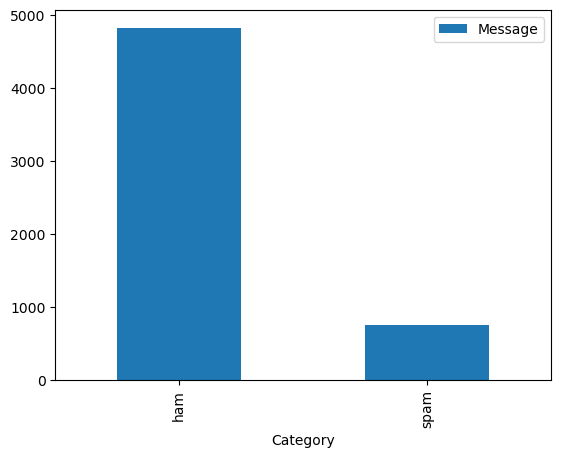

In [103]:
df.groupby('Category').count().plot.bar()
plt.show()

In [104]:
############ Data Preprocessing

In [105]:
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

In [106]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")          # we downloaded english stopwords
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ushas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
df['Message'][0]         # one row text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [108]:
# Doing all cleaning process using regex, stopwords for all data
df['Message'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['Message']]
df['Message'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['Message']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

,Category,Message
5178,spam,sms auction brand new nokia auction today auct...
3810,ham,funeral home audrey dad
548,ham,sorry took long omw
4921,ham,g says never answer texts confirm deny
4232,ham,u really pig leh sleep much dad wake smth eat ...
...,...,...
2485,ham,promise getting soon text morning let know mad...
4977,ham,gorgeous keep pix cumming thank
861,ham,work going min
2276,ham,telly brdget jones


In [109]:
df.to_csv('cleaned2_email.csv')

In [110]:
############ Cleaning by stemmer,regex,stopwords
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [111]:
# print(words)

In [112]:
# words = stopwords.words("nepali")
# words

In [113]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [114]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()   # string to number
X = df['Message']       # independent
Y = df['Category']   # dependent

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
# step that data follow or path that data are processed  / kun kun step paar garera janxa
# simply architecture jasto
pipeline = Pipeline([('vect', vectorizer),
                     ('clf', LogisticRegression())])
                     
                     # first vetorizer
                     # chi2,k=2000 means to choose 2000 data from each news
                     # use classifier ie logisticRegression()

# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [115]:
X_test

4866                           really sorry lit hair fire
5297    darling sister school resuming minimum wait pe...
5510                                  went project centre
931     really sorry b able friday hope u find alterna...
631                         please dont say like hi hi hi
                              ...                        
5333    neither sterm voice studying fine sure thing r...
1668         dad gonna call gets work ask crazy questions
3641    really skateboarding despite fact gets thrown ...
1415                    wats ur opinion abt abt character
3419    life never much fun great came made truly spec...
Name: Message, Length: 836, dtype: object

In [116]:
y_test

4866     ham
5297     ham
5510     ham
931      ham
631      ham
        ... 
5333     ham
1668     ham
3641     ham
1415     ham
3419    spam
Name: Category, Length: 836, dtype: object

In [117]:
total_len = (len(X_train))
print("All total length = ",total_len)    # total row
print("X_train length and Y_train length = ", len(X_train),len(y_train))   #total train dataset length
print("X_test length = ", len(X_test)) 

All total length =  4736
X_train length and Y_train length =  4736 4736
X_test length =  836


In [118]:
predicted = model.predict(X_test)
predicted

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'h

In [ ]:
for i in range(len(X_test)):
    print("Predicted:", predicted[i], "     Actual :", y_test.values[i])


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
accuracy = accuracy_score(y_test,predicted)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
from sklearn.metrics import classification_report

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
report = classification_report(y_test, predicted)

print("Classification Report:\n", report)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),y_test)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['ham','spam']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [93]:
c=pd.read_csv("cleaned2_email.csv", index_col=0)
c

,Category,Message
2103,ham,audrie lousy autocorrect
2860,ham,know god created gap fingers one made comes am...
338,ham,sleeping surfing
2689,ham,yes know cheesy songs frosty snowman
4015,ham,sorry text amp drive coherently see twenty
...,...,...
4409,ham,take care sleep well need learn change life ne...
472,ham,long since screamed princess
1566,ham,lt gt g saw days ago guy wants sell wifi lt gt...
1181,ham,chennai velachery
